In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [32]:
#Dataset
homelessness = pd.read_csv('./Data set/homelessness.csv')
sales = pd.read_csv('./Data set/walmart.csv')
temperatures = pd.read_csv('./Data set/temperatures.csv')
avocados=pd.read_csv('./Data set/avocado.csv')

## Inspecting a DataFrame

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

* .head() returns the first few rows (the “head” of the DataFrame).
* .info() shows information on each of the columns, such as the data type and number of missing values.
* .shape returns the number of rows and columns of the DataFrame.
* .describe() calculates a few summary statistics for each column.

In [3]:
# Print the head of the homelessness data
print(homelessness.head())

                         state  individuals  family_members  state_pop
region                                                                
East South Central     Alabama       2570.0           864.0    4887681
Pacific                 Alaska       1434.0           582.0     735139
Mountain               Arizona       7259.0          2606.0    7158024
West South Central    Arkansas       2280.0           432.0    3009733
Pacific             California     109008.0         20964.0   39461588


In [4]:
# Print information about homelessness
print(homelessness.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, East South Central to Mountain
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           51 non-null     object 
 1   individuals     51 non-null     float64
 2   family_members  51 non-null     float64
 3   state_pop       51 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 2.0+ KB
None


In [5]:
# Print the shape of homelessness
print(homelessness.shape)

(51, 4)


In [6]:
# Print a description of homelessness
print(homelessness.describe())

         individuals  family_members     state_pop
count      51.000000       51.000000  5.100000e+01
mean     7225.784314     3504.882353  6.405637e+06
std     15991.025083     7805.411811  7.327258e+06
min       434.000000       75.000000  5.776010e+05
25%      1446.500000      592.000000  1.777414e+06
50%      3082.000000     1482.000000  4.461153e+06
75%      6781.500000     3196.000000  7.340946e+06
max    109008.000000    52070.000000  3.946159e+07


## Parts of a DataFrame
To better understand DataFrame objects, it's useful to know that they consist of three components, stored as attributes:

* .values: A two-dimensional NumPy array of values.
* .columns: An index of columns: the column names.
* .index: An index for the rows: either row numbers or row names.
 You can usually think of indexes as a list of strings or numbers, though the pandas Index data type allows for more sophisticated options.

In [7]:
# Import pandas using the alias pd
import pandas as pd

# Print the values of homelessness
print(homelessness.values)

# Print the column index of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)

[['Alabama' 2570.0 864.0 4887681]
 ['Alaska' 1434.0 582.0 735139]
 ['Arizona' 7259.0 2606.0 7158024]
 ['Arkansas' 2280.0 432.0 3009733]
 ['California' 109008.0 20964.0 39461588]
 ['Colorado' 7607.0 3250.0 5691287]
 ['Connecticut' 2280.0 1696.0 3571520]
 ['Delaware' 708.0 374.0 965479]
 ['District of Columbia' 3770.0 3134.0 701547]
 ['Florida' 21443.0 9587.0 21244317]
 ['Georgia' 6943.0 2556.0 10511131]
 ['Hawaii' 4131.0 2399.0 1420593]
 ['Idaho' 1297.0 715.0 1750536]
 ['Illinois' 6752.0 3891.0 12723071]
 ['Indiana' 3776.0 1482.0 6695497]
 ['Iowa' 1711.0 1038.0 3148618]
 ['Kansas' 1443.0 773.0 2911359]
 ['Kentucky' 2735.0 953.0 4461153]
 ['Louisiana' 2540.0 519.0 4659690]
 ['Maine' 1450.0 1066.0 1339057]
 ['Maryland' 4914.0 2230.0 6035802]
 ['Massachusetts' 6811.0 13257.0 6882635]
 ['Michigan' 5209.0 3142.0 9984072]
 ['Minnesota' 3993.0 3250.0 5606249]
 ['Mississippi' 1024.0 328.0 2981020]
 ['Missouri' 3776.0 2107.0 6121623]
 ['Montana' 983.0 422.0 1060665]
 ['Nebraska' 1745.0 676.0 192

<div class="css-ikv0qb"><h1 class="css-f2t179">Sorting rows</h1><div class="css-hu6jey"><div class="">
<p>Finding interesting bits of data in a DataFrame is often easier if you change the order of the rows. You can sort the rows by passing a column name to <code>.sort_values()</code>.</p>
<p>In cases where rows have the same value (this is common if you sort on a categorical variable), you may wish to break the ties by sorting on another column. You can sort on multiple columns in this way by passing a list of column names.</p>
<table>
<thead>
<tr>
<th>Sort on …</th>
<th>Syntax</th>
</tr>
</thead>
<tbody>
<tr>
<td>one column</td>
<td><code>df.sort_values("breed")</code></td>
</tr>
<tr>
<td>multiple columns</td>
<td><code>df.sort_values(["breed", "weight_kg"])</code></td>
</tr>
</tbody>
</table>
<p>By combining <code>.sort_values()</code> with <code>.head()</code>, you can answer questions in the form, "What are the top cases where…?".</p> </div></div>


In [5]:
# Sort homelessness by individuals
homelessness_ind =homelessness.sort_values('individuals')

# Print the top few rows
print(homelessness_ind.head())

                           state  individuals  family_members  state_pop
region                                                                  
Mountain                 Wyoming        434.0           205.0     577601
West North Central  North Dakota        467.0            75.0     758080
South Atlantic          Delaware        708.0           374.0     965479
New England         Rhode Island        747.0           354.0    1058287
New England              Vermont        780.0           511.0     624358


In [6]:
# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values("family_members",ascending=False)

# Print the top few rows
print(homelessness_fam.head())

                            state  individuals  family_members  state_pop
region                                                                   
Mid-Atlantic             New York      39827.0         52070.0   19530351
Pacific                California     109008.0         20964.0   39461588
New England         Massachusetts       6811.0         13257.0    6882635
South Atlantic            Florida      21443.0          9587.0   21244317
West South Central          Texas      19199.0          6111.0   28628666


In [7]:
# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(["region","family_members"] ,ascending=[True,False])

# Print the top few rows
print(homelessness_reg_fam.head())

                        state  individuals  family_members  state_pop
region                                                               
East North Central   Illinois       6752.0          3891.0   12723071
East North Central       Ohio       6929.0          3320.0   11676341
East North Central   Michigan       5209.0          3142.0    9984072
East North Central  Wisconsin       2740.0          2167.0    5807406
East North Central    Indiana       3776.0          1482.0    6695497


<div class="listview__content"><div class="css-ikv0qb"><h1 class="css-f2t179">Subsetting columns</h1><div class="css-hu6jey"><div class="">
<p>When working with data, you may not need all of the variables in your dataset. Square brackets (<code>[]</code>) can be used to select only the columns that matter to you in an order that makes sense to you.
To select only <code>"col_a"</code> of the DataFrame <code>df</code>, use</p>
<pre><code>df["col_a"]
</code></pre>
<p>To select <code>"col_a"</code> and <code>"col_b"</code> of <code>df</code>, use</p>
<pre><code>df[["col_a", "col_b"]]
</code></pre>
</div></div></div></div>

In [8]:
# Select the individuals column
individuals = homelessness['individuals']

# Print the head of the result
print(individuals.head())

region
East South Central      2570.0
Pacific                 1434.0
Mountain                7259.0
West South Central      2280.0
Pacific               109008.0
Name: individuals, dtype: float64


In [9]:
# Select the state and family_members columns
state_fam = homelessness[['state','family_members']]

# Print the head of the result
print(state_fam.head())

                         state  family_members
region                                        
East South Central     Alabama           864.0
Pacific                 Alaska           582.0
Mountain               Arizona          2606.0
West South Central    Arkansas           432.0
Pacific             California         20964.0


In [10]:
# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals','state']]

# Print the head of the result
print(ind_state.head())

                    individuals       state
region                                     
East South Central       2570.0     Alabama
Pacific                  1434.0      Alaska
Mountain                 7259.0     Arizona
West South Central       2280.0    Arkansas
Pacific                109008.0  California


<div class="css-ikv0qb"><h1 class="css-f2t179">Subsetting rows</h1><div class="css-hu6jey"><div class="">
<p>A large part of data science is about finding which bits of your dataset are interesting. One of the simplest techniques for this is to find a subset of rows that match some criteria. This is sometimes known as <em>filtering rows</em> or <em>selecting rows</em>.</p>
<p>There are many ways to subset a DataFrame, perhaps the most common is to use relational operators to return <code>True</code> or <code>False</code> for each row, then pass that inside square brackets.</p>
<pre><code>dogs[dogs["height_cm"] &gt; 60]
dogs[dogs["color"] == "tan"]
</code></pre>
<p>You can filter for multiple conditions at once by using the "bitwise and" operator, <code>&amp;</code>.</p>
<pre><code>dogs[(dogs["height_cm"] &gt; 60) &amp; (dogs["color"] == "tan")]
</code></pre>
</div></div></div>

In [11]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals'] > 10000]

# See the result
print(ind_gt_10k)

                         state  individuals  family_members  state_pop
region                                                                
Pacific             California     109008.0         20964.0   39461588
South Atlantic         Florida      21443.0          9587.0   21244317
Mid-Atlantic          New York      39827.0         52070.0   19530351
Pacific                 Oregon      11139.0          3337.0    4181886
West South Central       Texas      19199.0          6111.0   28628666
Pacific             Washington      16424.0          5880.0    7523869


In [15]:
# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region']=='Mountain']

# See the result
print(mountain_reg )

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
5   Mountain    Colorado       7607.0          3250.0    5691287
12  Mountain       Idaho       1297.0           715.0    1750536
26  Mountain     Montana        983.0           422.0    1060665
28  Mountain      Nevada       7058.0           486.0    3027341
31  Mountain  New Mexico       1949.0           602.0    2092741
44  Mountain        Utah       1904.0           972.0    3153550
50  Mountain     Wyoming        434.0           205.0     577601


In [16]:
# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members'] < 1000) & (homelessness['region']=="Pacific")]

# See the result
print(fam_lt_1k_pac)

    region   state  individuals  family_members  state_pop
1  Pacific  Alaska       1434.0           582.0     735139


<div class="css-ikv0qb"><h1 class="css-f2t179">Subsetting rows by categorical variables</h1><div class="css-hu6jey"><div class="">
<p>Subsetting data based on a categorical variable often involves using the "or" operator (<code>|</code>) to select rows from multiple categories. This can get tedious when you want all states in one of three different regions, for example. 
Instead, use the <code>.isin()</code> method, which will allow you to tackle this problem by writing one condition instead of three separate ones.</p>
<pre><code>colors = ["brown", "black", "tan"]
condition = dogs["color"].isin(colors)
dogs[condition]
</code></pre>
</div></div></div>


In [17]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic =homelessness[homelessness['region'].isin(["South Atlantic","Mid-Atlantic"])]
# See the result
print(south_mid_atlantic)

            region                 state  individuals  family_members  \
7   South Atlantic              Delaware        708.0           374.0   
8   South Atlantic  District of Columbia       3770.0          3134.0   
9   South Atlantic               Florida      21443.0          9587.0   
10  South Atlantic               Georgia       6943.0          2556.0   
20  South Atlantic              Maryland       4914.0          2230.0   
30    Mid-Atlantic            New Jersey       6048.0          3350.0   
32    Mid-Atlantic              New York      39827.0         52070.0   
33  South Atlantic        North Carolina       6451.0          2817.0   
38    Mid-Atlantic          Pennsylvania       8163.0          5349.0   
40  South Atlantic        South Carolina       3082.0           851.0   
46  South Atlantic              Virginia       3928.0          2047.0   
48  South Atlantic         West Virginia       1021.0           222.0   

    state_pop  
7      965479  
8      701547  
9 

In [18]:
# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness =homelessness[homelessness['state'].isin(canu)]

# See the result
print(mojave_homelessness)

      region       state  individuals  family_members  state_pop
2   Mountain     Arizona       7259.0          2606.0    7158024
4    Pacific  California     109008.0         20964.0   39461588
28  Mountain      Nevada       7058.0           486.0    3027341
44  Mountain        Utah       1904.0           972.0    3153550


<div class="css-ikv0qb"><h1 class="css-f2t179">Adding new columns</h1><div class="css-hu6jey"><div class="">
<p>You aren't stuck with just the data you are given. Instead, you can add new columns to a DataFrame. This has many names, such as <em>transforming</em>, <em>mutating</em>, and <em>feature engineering</em>.</p>
<p>You can create new columns from scratch, but it is also common to derive them from other columns, for example, by adding columns together or by changing their units. </p>
</div></div></div>

In [19]:
# Add total col as sum of individuals and family_members
homelessness['total']=homelessness['individuals']+homelessness['family_members']
# Add p_individuals col as proportion of total that are individuals
homelessness['p_individuals']=homelessness['individuals'] / homelessness['total']

# See the result
print(homelessness)

                region                 state  individuals  family_members  \
0   East South Central               Alabama       2570.0           864.0   
1              Pacific                Alaska       1434.0           582.0   
2             Mountain               Arizona       7259.0          2606.0   
3   West South Central              Arkansas       2280.0           432.0   
4              Pacific            California     109008.0         20964.0   
5             Mountain              Colorado       7607.0          3250.0   
6          New England           Connecticut       2280.0          1696.0   
7       South Atlantic              Delaware        708.0           374.0   
8       South Atlantic  District of Columbia       3770.0          3134.0   
9       South Atlantic               Florida      21443.0          9587.0   
10      South Atlantic               Georgia       6943.0          2556.0   
11             Pacific                Hawaii       4131.0          2399.0   

<div class="css-ikv0qb"><h1 class="css-f2t179">Combo-attack!</h1><div class="css-hu6jey"><div class="">
<p>You've seen the four most common types of data manipulation: sorting rows, subsetting columns, subsetting rows, and adding new columns. In a real-life data analysis, you can mix and match these four manipulations to answer a multitude of questions.</p>
<p>In this exercise, you'll answer the question, "Which state has the highest number of homeless individuals per 10,000 people in the state?" Combine your new <code>pandas</code> skills to find out.</p></div></div></div>

In [21]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness['individuals'] / homelessness["state_pop"]

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness["indiv_per_10k"] >20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k",ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state','indiv_per_10k']]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


<div class="css-ikv0qb"><h1 class="css-f2t179">Mean and median</h1><div class="css-hu6jey"><div class="">
<p>Summary statistics are exactly what they sound like - they summarize many numbers in one statistic. For example, mean, median, minimum, maximum, and standard deviation are summary statistics. Calculating summary statistics allows you to get a better sense of your data, even if there's a lot of it. </p>
</div></div></div>

In [29]:
# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print("Mean", sales['weekly_sales'].mean())

# Print the median of weekly_sales
print("Median", sales['weekly_sales'].median())

   store type  department        date  weekly_sales  is_holiday  \
0      1    A           1  2010-02-05      24924.50       False   
1      1    A           1  2010-03-05      21827.90       False   
2      1    A           1  2010-04-02      57258.43       False   
3      1    A           1  2010-05-07      17413.94       False   
4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   t

The mean weekly sales amount is almost double the median weekly sales amount! This can tell you that there are a few very high sales weeks that are making the mean so much higher than the median.

<div class="css-ikv0qb"><h1 class="css-f2t179">Summarizing dates</h1><div class="css-hu6jey"><div class="">
<p>Summary statistics can also be calculated on date columns that have values with the data type <code>datetime64</code>. Some summary statistics — like mean — don't make a ton of sense on dates, but others are super helpful, for example, minimum and maximum, which allow you to see what time range your data covers.</p>
</div></div></div>

In [30]:
# Print the maximum of the date column
print(sales['date'].max())

# Print the minimum of the date column
print(sales['date'].min())


2012-10-26
2010-02-05


<div class="css-ikv0qb"><h1 class="css-f2t179">Efficient summaries</h1><div class="css-hu6jey"><div class="">
<p>While pandas and NumPy have tons of functions, sometimes, you may need a different function to summarize your data.</p>
<p>The <code>.agg()</code> method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once, making your aggregations super-efficient. For example, </p>
<pre><code>df['column'].agg(function)
</code></pre>
<p>In the custom function for this exercise, "IQR" is short for inter-quartile range, which is the 75th percentile minus the 25th percentile. It's an alternative to standard deviation that is helpful if your data contains outliers.</p>
</div></div></div>

In [31]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

16.583333333333336


In [32]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg(iqr))


temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [55]:
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg({iqr,np.median}))

        temperature_c  fuel_price_usd_per_l  unemployment
median      16.966667              0.743381         8.099
iqr         16.583333              0.073176         0.565


<div class="css-ikv0qb"><h1 class="css-f2t179">Cumulative statistics</h1><div class="css-hu6jey"><div class="">
<p>Cumulative statistics can also be helpful in tracking summary statistics over time. In this exercise, you'll calculate the cumulative sum and cumulative max of a department's weekly sales, which will allow you to identify what the total sales were so far as well as what the highest weekly sales were so far. </p>
<p>A DataFrame called <code>sales_1_1</code> has been created for you, which contains the sales data for department 1 of store 1. <code>pandas</code> is loaded as <code>pd</code>.</p></div></div></div>

In [40]:
# Sort sales_1_1 by date
sales_1_1=sales[(sales['department'] ==1) & (sales['store'] ==1)]
sales_1_1 = sales_1_1.sort_values('date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] =sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales']=sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

          date  weekly_sales  cum_weekly_sales  cum_max_sales
0   2010-02-05      24924.50          24924.50       24924.50
1   2010-03-05      21827.90          46752.40       24924.50
2   2010-04-02      57258.43         104010.83       57258.43
3   2010-05-07      17413.94         121424.77       57258.43
4   2010-06-04      17558.09         138982.86       57258.43
5   2010-07-02      16333.14         155316.00       57258.43
6   2010-08-06      17508.41         172824.41       57258.43
7   2010-09-03      16241.78         189066.19       57258.43
8   2010-10-01      20094.19         209160.38       57258.43
9   2010-11-05      34238.88         243399.26       57258.43
10  2010-12-03      22517.56         265916.82       57258.43
11  2011-01-07      15984.24         281901.06       57258.43


<div class="css-ikv0qb"><h1 class="css-f2t179">Dropping duplicates</h1><div class="css-hu6jey"><div class="">
<p>Removing duplicates is an essential skill to get accurate counts because often, you don't want to count the same thing multiple times. In this exercise, you'll create some new DataFrames using unique values from <code>sales</code>.</p>
</div></div></div>

In [42]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store','type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store','department'])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday']].drop_duplicates(subset=['date'])

# Print date col of holiday_dates
print(holiday_dates)

      store type  department        date  weekly_sales  is_holiday  \
0         1    A           1  2010-02-05      24924.50       False   
901       2    A           1  2010-02-05      35034.06       False   
1798      4    A           1  2010-02-05      38724.42       False   
2699      6    A           1  2010-02-05      25619.00       False   
3593     10    B           1  2010-02-05      40212.84       False   

      temperature_c  fuel_price_usd_per_l  unemployment  
0          5.727778              0.679451         8.106  
901        4.550000              0.679451         8.324  
1798       6.533333              0.686319         8.623  
2699       4.683333              0.679451         7.259  
3593      12.411111              0.782478         9.765  
    store type  department        date  weekly_sales  is_holiday  \
0       1    A           1  2010-02-05      24924.50       False   
12      1    A           2  2010-02-05      50605.27       False   
24      1    A           3 

<div class="css-ikv0qb"><h1 class="css-f2t179">Counting categorical variables</h1><div class="css-hu6jey"><div class="">
<p>Counting is a great way to get an overview of your data and to spot curiosities that you might not notice otherwise. In this exercise, you'll count the number of each type of store and the number of each department number using the DataFrames you created in the previous exercise:</p>


In [43]:
# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props =  store_types['type'].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts['department'].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted =  store_depts['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

type
A    11
B     1
Name: count, dtype: int64
type
A    0.916667
B    0.083333
Name: proportion, dtype: float64
department
1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: count, Length: 80, dtype: int64
department
1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: proportion, Length: 80, dtype: float64


<div class="css-ikv0qb"><h1 class="css-f2t179">What percent of sales occurred at each store type?</h1><div class="css-hu6jey"><div class="">
<p>While <code>.groupby()</code> is useful, you can calculate grouped summary statistics without it. </p>
<p>Walmart distinguishes three types of stores: "supercenters," "discount stores," and "neighborhood markets," encoded in this dataset as type "A," "B," and "C." In this exercise, you'll calculate the total sales made at each store type, without using <code>.groupby()</code>. You can then use these numbers to see what proportion of Walmart's total sales were made at each type.</p>
<p><code>sales</code> is available and <code>pandas</code> is imported as <code>pd</code>.</p></div></div></div>

In [44]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type) 

[0.9097747 0.0902253 0.       ]


<div class="css-ikv0qb"><h1 class="css-f2t179">Calculations with .groupby()</h1><div class="css-hu6jey"><div class="">
<p>The <code>.groupby()</code> method makes life much easier. In this exercise, you'll perform the same calculations as last time, except you'll use the <code>.groupby()</code> method. You'll also perform calculations on data grouped by two variables to see if sales differ by store type depending on if it's a holiday week or not. </p>
</div></div></div>

In [47]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type/ sum(sales_by_type)
print(sales_propn_by_type)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [49]:

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday =sales.groupby(['type','is_holiday'])['weekly_sales'].sum()
print(sales_by_type_is_holiday)

type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


<div class="css-ikv0qb"><h1 class="css-f2t179">Multiple grouped summaries</h1><div class="css-hu6jey"><div class="">
<p>Earlier in this chapter, you saw that the <code>.agg()</code> method is useful to compute multiple statistics on multiple variables. It also works with grouped data. NumPy, which is imported as <code>np</code>, has many different summary statistics functions, including: <code>np.min</code>, <code>np.max</code>, <code>np.mean</code>, and <code>np.median</code>.</p>
</div></div></div>

In [56]:

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')["weekly_sales"].agg([np.min,np.max,np.mean,np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[["unemployment","fuel_price_usd_per_l"]].agg([np.min,np.max,np.mean,np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

        amin       amax          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                         fuel_price_usd_per_l            \
             amin   amax      mean median                 amin      amax   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


<div class="css-ikv0qb"><h1 class="css-f2t179">Pivoting on one variable</h1><div class="css-hu6jey"><div class="">
<p>Pivot tables are the standard way of aggregating data in spreadsheets. </p>
<p>In pandas, pivot tables are essentially another way of performing grouped calculations. That is, the <code>.pivot_table()</code> method is an alternative to <code>.groupby()</code>. </p>
<p>In this exercise, you'll perform calculations using <code>.pivot_table()</code> to replicate the calculations you performed in the last lesson using <code>.groupby()</code>.</p>
</div></div></div>

In [57]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values="weekly_sales",index="type")

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [58]:
# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales",index="type",aggfunc=[np.mean,np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [59]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales",index="type",columns="is_holiday",aggfunc=np.mean)

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


<div class="css-ikv0qb"><h1 class="css-f2t179">Fill in missing values and sum values with pivot tables</h1><div class="css-hu6jey"><div class="">
<p>The <code>.pivot_table()</code> method has several useful arguments, including <code>fill_value</code> and <code>margins</code>. </p>
<ul>
<li><code>fill_value</code> replaces missing values with a real value (known as <em>imputation</em>).
<li><code>margins</code> is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.</li>
</ul>
<p>In this exercise, you'll practice using these arguments to up your pivot table skills, which will help you crunch numbers more efficiently!</p>
</div></div></div>

In [60]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values="weekly_sales",index="type",columns="department",fill_value=0) )

department            1              2             3             4   \
type                                                                  
A           30961.725379   67600.158788  17160.002955  44285.399091   
B           44050.626667  112958.526667  30580.655000  51219.654167   

department            5             6             7             8   \
type                                                                 
A           34821.011364   7136.292652  38454.336818  48583.475303   
B           63236.875000  10717.297500  52909.653333  90733.753333   

department            9             10  ...            90            91  \
type                                    ...                               
A           30120.449924  30930.456364  ...  85776.905909  70423.165227   
B           66679.301667  48595.126667  ...  14780.210000  13199.602500   

department             92            93            94             95  \
type                                                         

In [61]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0,margins=True))

type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          21367.042857    9528.538333  20337.607681
97          28471.266970    5828.873333  26584.400833
98          12875.423182     217.428333  11820.590278
99            379.123659       0.000000    379.123659
All         23674.667242   25696.678370  23843.950149

[81 rows x 3 columns]


<div class="css-ikv0qb"><h1 class="css-f2t179">Setting and removing indexes</h1><div class="css-hu6jey"><div class="">
<p>pandas allows you to designate columns as an <em>index</em>. This enables cleaner code when taking subsets (as well as providing more efficient lookup under some circumstances).</p>
</div></div></div>

In [9]:
# Look at temperatures
print(temperatures.head)

# Set the index of temperatures to city
temperatures_ind = temperatures.set_index("city")

# Look at temperatures_ind
print(temperatures_ind)

# Reset the temperatures_ind index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the temperatures_ind index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

<bound method NDFrame.head of              date     city        country  avg_temp_c
0      2000-01-01  Abidjan  Côte D'Ivoire      27.293
1      2000-02-01  Abidjan  Côte D'Ivoire      27.685
2      2000-03-01  Abidjan  Côte D'Ivoire      29.061
3      2000-04-01  Abidjan  Côte D'Ivoire      28.162
4      2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...      ...            ...         ...
16495  2013-05-01     Xian          China      18.979
16496  2013-06-01     Xian          China      23.522
16497  2013-07-01     Xian          China      25.251
16498  2013-08-01     Xian          China      24.528
16499  2013-09-01     Xian          China         NaN

[16500 rows x 4 columns]>
               date        country  avg_temp_c
city                                          
Abidjan  2000-01-01  Côte D'Ivoire      27.293
Abidjan  2000-02-01  Côte D'Ivoire      27.685
Abidjan  2000-03-01  Côte D'Ivoire      29.061
Abidjan  2000-04-01  Côte D'Ivoire      28.162
Abidjan  2000

<div class="css-ikv0qb"><h1 class="css-f2t179">Subsetting with .loc[]</h1><div class="css-hu6jey"><div class="">
<p>The killer feature for indexes is <code>.loc[]</code>: a subsetting method that accepts index values. When you pass it a single argument, it will take a subset of rows.</p>
<p>The code for subsetting using <code>.loc[]</code> can be easier to read than standard square bracket subsetting, which can make your code less burdensome to maintain.</p>
</div></div></div>

In [10]:
# Make a list of cities to subset on
cities = ['Moscow', 'Saint Petersburg']
print(cities)

# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

['Moscow', 'Saint Petersburg']
             date              city country  avg_temp_c
10725  2000-01-01            Moscow  Russia      -7.313
10726  2000-02-01            Moscow  Russia      -3.551
10727  2000-03-01            Moscow  Russia      -1.661
10728  2000-04-01            Moscow  Russia      10.096
10729  2000-05-01            Moscow  Russia      10.357
...           ...               ...     ...         ...
13360  2013-05-01  Saint Petersburg  Russia      12.355
13361  2013-06-01  Saint Petersburg  Russia      17.185
13362  2013-07-01  Saint Petersburg  Russia      17.234
13363  2013-08-01  Saint Petersburg  Russia      17.153
13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 4 columns]
                        date country  avg_temp_c
city                                            
Moscow            2000-01-01  Russia      -7.313
Moscow            2000-02-01  Russia      -3.551
Moscow            2000-03-01  Russia      -1.661
Moscow            2000-04-01

<div class="css-ikv0qb"><h1 class="css-f2t179">Setting multi-level indexes</h1><div class="css-hu6jey"><div class="">
<p>Indexes can also be made out of multiple columns, forming a <em>multi-level index</em> (sometimes called a <em>hierarchical index</em>). There is a trade-off to using these. </p>
<p>The benefit is that multi-level indexes make it more natural to reason about nested categorical variables. For example, in a clinical trial, you might have control and treatment groups. Then each test subject belongs to one or another group, and we can say that a test subject is nested inside the treatment group. Similarly, in the temperature dataset, the city is located in the country, so we can say a city is nested inside the country. </p>
<p>The main downside is that the code for manipulating indexes is different from the code for manipulating columns, so you have to learn two syntaxes and keep track of how your data is represented.</p>
</div></div></div>

In [9]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(["country","city"])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil","Rio De Janeiro"),("Pakistan","Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                               date  avg_temp_c
country  city                                  
Brazil   Rio De Janeiro  2000-01-01      25.974
         Rio De Janeiro  2000-02-01      26.699
         Rio De Janeiro  2000-03-01      26.270
         Rio De Janeiro  2000-04-01      25.750
         Rio De Janeiro  2000-05-01      24.356
...                             ...         ...
Pakistan Lahore          2013-05-01      33.457
         Lahore          2013-06-01      34.456
         Lahore          2013-07-01      33.279
         Lahore          2013-08-01      31.511
         Lahore          2013-09-01         NaN

[330 rows x 2 columns]


<div class="css-ikv0qb"><h1 class="css-f2t179">Sorting by index values</h1><div class="css-hu6jey"><div class="">
<p>Previously, you changed the order of the rows in a DataFrame by calling <code>.sort_values()</code>. It's also useful to be able to sort by elements in the index. For this, you need to use <code>.sort_index()</code>.</p>
<p><code>pandas</code> is loaded as <code>pd</code>. <code>temperatures_ind</code> has a multi-level index of </div></div></div>

In [10]:
# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level="city"))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country","city"], ascending=[True,False]))

                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]
                             date  avg_temp_c
country       city                           
Côte D'Ivoire Abidjan  2000-01-01      27.293
              Abidjan  2000-02-01      27.685
              Abidjan  2000-03-01      29.061
              Abidjan  2000-04-01      28.162
              Abidjan  2000-05-01      27.547
...                           ...         ...
China         Xian     2013-05-01      18.979
 

<div class="css-ikv0qb"><h1 class="css-f2t179">Slicing index values</h1><div class="css-hu6jey"><div class="">
<p>Slicing lets you select consecutive elements of an object using <code>first:last</code> syntax. DataFrames can be sliced by index values or by row/column number; we'll start with the first case. This involves slicing inside the <code>.loc[]</code> method.</p>
<p>Compared to slicing lists, there are a few things to remember.</p>
<ul>
<li>You can only slice an index if the index is sorted (using <code>.sort_index()</code>).</li>
<li>To slice at the outer level, <code>first</code> and <code>last</code> can be strings.</li>
<li>To slice at inner levels, <code>first</code> and <code>last</code> should be tuples.</li>
<li>If you pass a single slice to <code>.loc[]</code>, it will slice the rows.</li>
</ul>
</div></div></div>

In [14]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore":"Moscow"])

# Subset rows from , Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan","Lahore"):("Russia","Moscow")])

                                 date  avg_temp_c
country  city                                    
Pakistan Faisalabad        2000-01-01      12.792
         Faisalabad        2000-02-01      14.339
         Faisalabad        2000-03-01      20.309
         Faisalabad        2000-04-01      29.072
         Faisalabad        2000-05-01      34.845
...                               ...         ...
Russia   Saint Petersburg  2013-05-01      12.355
         Saint Petersburg  2013-06-01      17.185
         Saint Petersburg  2013-07-01      17.234
         Saint Petersburg  2013-08-01      17.153
         Saint Petersburg  2013-09-01         NaN

[1155 rows x 2 columns]
                          date  avg_temp_c
country city                              
Mexico  Mexico      2000-01-01      12.694
        Mexico      2000-02-01      14.677
        Mexico      2000-03-01      17.376
        Mexico      2000-04-01      18.294
        Mexico      2000-05-01      18.562
...                     

<div class="css-ikv0qb"><h1 class="css-f2t179">Slicing in both directions</h1><div class="css-hu6jey"><div class="">
<p>You've seen slicing DataFrames by rows and by columns, but since DataFrames are two-dimensional objects, it is often natural to slice both dimensions at once. That is, by passing two arguments to <code>.loc[]</code>, you can subset by rows and columns in one go.</p>
</div></div></div>

In [17]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[('India','Hyderabad'):('Iraq','Baghdad')])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,"date":'avg_temp_c'])

# Subset in both directions at once
print(temperatures_srt.loc[('India','Hyderabad'):('Iraq','Baghdad'),"date":'avg_temp_c'])

                         date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
...                       ...         ...
Iraq    Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]
                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
...                        ...         ...
Zimbabwe    Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020

<div class="css-ikv0qb"><h1 class="css-f2t179">Slicing time series</h1><div class="css-hu6jey"><div class="">
<p>Slicing is particularly useful for time series since it's a common thing to want to filter for data within a date range. Add the <code>date</code> column to the index, then use <code>.loc[]</code> to perform the subsetting. The important thing to remember is to keep your dates in ISO 8601 format, that is, <code>"yyyy-mm-dd"</code> for year-month-day, <code>"yyyy-mm"</code> for year-month, and <code>"yyyy"</code> for year.</p>
<p>Recall from Chapter 1 that you can combine multiple Boolean conditions using logical operators, such as <code>&amp;</code>. To do so in one line of code, you'll need to add parentheses <code>()</code> around each condition. </p>
</div></div></div>

In [18]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures['date']>= '2010-01-01') & (temperatures['date']<= '2011-12-01')]
print(temperatures_bool)

# Set date as the index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc['2010-08':'2011-2'])

             date     city        country  avg_temp_c
120    2010-01-01  Abidjan  Côte D'Ivoire      28.270
121    2010-02-01  Abidjan  Côte D'Ivoire      29.262
122    2010-03-01  Abidjan  Côte D'Ivoire      29.596
123    2010-04-01  Abidjan  Côte D'Ivoire      29.068
124    2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...      ...            ...         ...
16474  2011-08-01     Xian          China      23.069
16475  2011-09-01     Xian          China      16.775
16476  2011-10-01     Xian          China      12.587
16477  2011-11-01     Xian          China       7.543
16478  2011-12-01     Xian          China      -0.490

[2400 rows x 4 columns]
                  city    country  avg_temp_c
date                                         
2010-01-01  Faisalabad   Pakistan      11.810
2010-01-01   Melbourne  Australia      20.016
2010-01-01   Chongqing      China       7.921
2010-01-01   São Paulo     Brazil      23.738
2010-01-01   Guangzhou      China      14.136
...  

<div class="css-ikv0qb"><h1 class="css-f2t179">Subsetting by row/column number</h1><div class="css-hu6jey"><div class="">
<p>The most common ways to subset rows are the ways we've previously discussed: using a Boolean condition or by index labels. However, it is also occasionally useful to pass row numbers.</p>
<p>This is done using <code>.iloc[]</code>, and like <code>.loc[]</code>, it can take two arguments to let you subset by rows and columns.</p>
</div></div></div>

In [19]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,2])

# Use slicing to get the first 5 rows
print(temperatures.iloc[:5,:])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

# Use slicing in both directions at once
print(temperatures.iloc[:5,2:4])

Côte D'Ivoire
         date     city        country  avg_temp_c
0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
             country  avg_temp_c
0      Côte D'Ivoire      27.293
1      Côte D'Ivoire      27.685
2      Côte D'Ivoire      29.061
3      Côte D'Ivoire      28.162
4      Côte D'Ivoire      27.547
...              ...         ...
16495          China      18.979
16496          China      23.522
16497          China      25.251
16498          China      24.528
16499          China         NaN

[16500 rows x 2 columns]
         country  avg_temp_c
0  Côte D'Ivoire      27.293
1  Côte D'Ivoire      27.685
2  Côte D'Ivoire      29.061
3  Côte D'Ivoire      28.162
4  Côte D'Ivoire      27.547


<div class="css-ikv0qb"><h1 class="css-f2t179">Pivot temperature by city and year</h1><div class="css-hu6jey"><div class="">
<p>It's interesting to see how temperatures for each city change over time—looking at every month results in a big table, which can be tricky to reason about. Instead, let's look at how temperatures change by year.</p>
<p>You can access the components of a date (year, month and day) using code of the form <code>dataframe["column"].dt.component</code>. For example, the month component is <code>dataframe["column"].dt.month</code>, and the year component is <code>dataframe["column"].dt.year</code>.</p>
<p>Once you have the year column, you can create a pivot table with the data aggregated by city and year, which you'll explore in the coming exercises.</p>
</div></div></div>

In [26]:
temperatures['date'] = pd.to_datetime(temperatures['date'], format='%Y-%m-%d')

# Add a year column to temperatures
temperatures['year']=temperatures['date'].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table("avg_temp_c",index=['country','city'],columns="year")

# See the result
print(temp_by_country_city_vs_year)

year                                 2000       2001       2002       2003  \
country       city                                                           
Afghanistan   Kabul             15.822667  15.847917  15.714583  15.132583   
Angola        Luanda            24.410333  24.427083  24.790917  24.867167   
Australia     Melbourne         14.320083  14.180000  14.075833  13.985583   
              Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh    Dhaka             25.905250  25.931250  26.095000  25.927417   
...                                   ...        ...        ...        ...   
United States Chicago           11.089667  11.703083  11.532083  10.481583   
              Los Angeles       16.643333  16.466250  16.430250  16.944667   
              New York           9.969083  10.931000  11.252167   9.836000   
Vietnam       Ho Chi Minh City  27.588917  27.831750  28.064750  27.827667   
Zimbabwe      Harare            20.283667  20.861000  21.079333 

<div class="css-ikv0qb"><h1 class="css-f2t179">Subsetting pivot tables</h1><div class="css-hu6jey"><div class="">
<p>A pivot table is just a DataFrame with sorted indexes, so the techniques you have learned already can be used to subset them. In particular, the <code>.loc[]</code> + slicing combination is often helpful.</p>
</div></div></div>

In [29]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc['Egypt':'India']

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi')]

# Subset in both directions at once
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi'),'2005':'2010']

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

<div class="css-ikv0qb"><h1 class="css-f2t179">Calculating on a pivot table</h1><div class="css-hu6jey"><div class="">
<p>Pivot tables are filled with summary statistics, but they are only a first step to finding something insightful. Often you'll need to perform further calculations on them. A common thing to do is to find the rows or columns where the highest or lowest value occurs. </p>
<p>Recall from Chapter 1 that you can easily subset a Series or DataFrame to find rows of interest using a logical condition inside of square brackets. For example: <code>series[series &gt; value]</code>.</p>
</div></div></div>

In [30]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year==mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")
print(mean_temp_by_city)
# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city==mean_temp_by_city.min()])

year
2013    20.312285
dtype: float64
country        city            
Afghanistan    Kabul               15.541955
Angola         Luanda              24.391616
Australia      Melbourne           14.275411
               Sydney              17.799250
Bangladesh     Dhaka               26.174440
                                     ...    
United States  Chicago             11.330825
               Los Angeles         16.675399
               New York            10.911034
Vietnam        Ho Chi Minh City    27.922857
Zimbabwe       Harare              20.699000
Length: 100, dtype: float64
country  city  
China    Harbin    4.876551
dtype: float64


<div class="css-ikv0qb"><h1 class="css-f2t179">Which avocado size is most popular? (Bar chart)</h1><div class="css-hu6jey"><div class="">
<p>Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.</p>
<p>Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting. </p>
</div></div></div>

In [35]:

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')["nb_sold"].sum()
nb_sold_by_size


         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

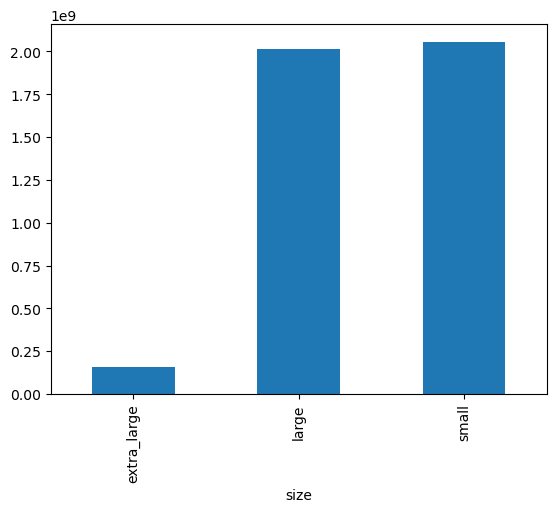

In [36]:
# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

<div class="css-ikv0qb"><h1 class="css-f2t179">Changes in sales over time (Line Plots)</h1><div class="css-hu6jey"><div class="">
<p>Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.</p>
</div></div></div>

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56
date
2015-01-04    27279606.03
2015-01-11    25081927.33
2015-01-18    24961540.48
2015-01-25    24094678.66
2015-02-01    39838734.08
                 ...     
2018-02-25    25434002.74
2018-03-04    26834303.05
2018-03-11    26094044.41
2018-03-18    26030618.97
2018-03-25    27480242.92
Name: nb_sold, Length: 169, dtype: float64


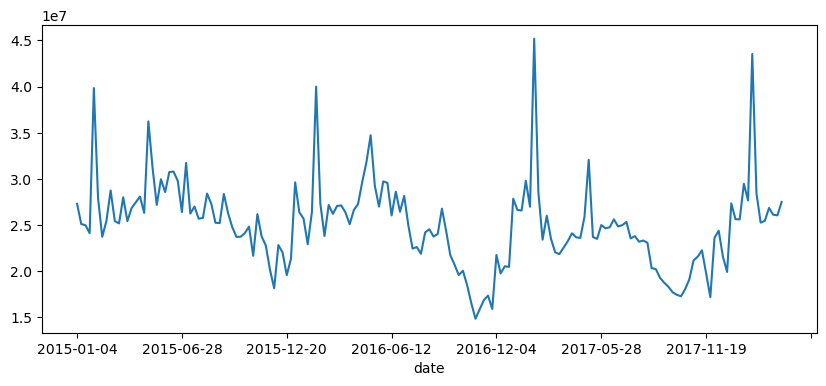

In [43]:
print(avocados.head())
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

print(nb_sold_by_date)
# Create a line plot of the number of avocados sold by date
plt.figure(figsize=(10,4)) 
nb_sold_by_date.plot(x="date", y="nb_sold")

# Show the plot
plt.show()

<div class="css-ikv0qb"><h1 class="css-f2t179">Avocado supply and demand (Scatter plot)</h1><div class="css-hu6jey"><div class="">
<p>Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.</p>
</div></div></div>

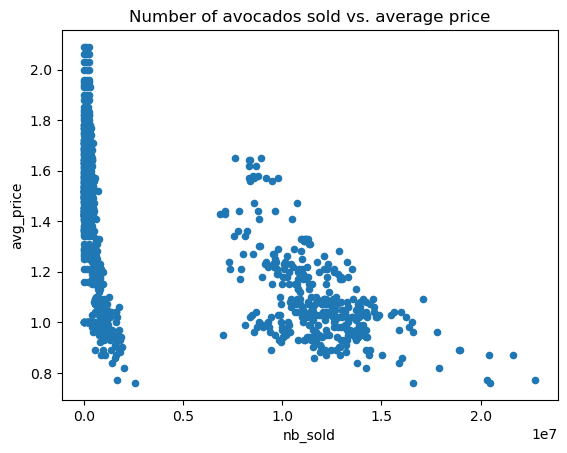

In [44]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x="nb_sold",y="avg_price",kind="scatter",title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

<div class="css-ikv0qb"><h1 class="css-f2t179">Price of conventional vs. organic avocados (Histogram)</h1><div class="css-hu6jey"><div class="">
<p>Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.</p>
</div></div></div>

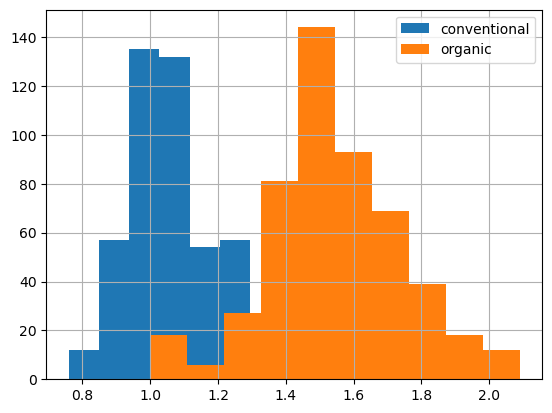

In [45]:
# Histogram of conventional avg_price 
avocados[avocados["type"] == "conventional"]["avg_price"].hist()

# Histogram of organic avg_price
avocados[avocados["type"] == "organic"]["avg_price"].hist()

# Add a legend
plt.legend(["conventional","organic"])

# Show the plot
plt.show()

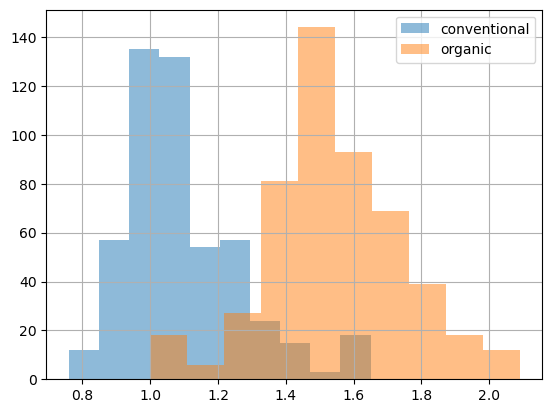

In [46]:
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

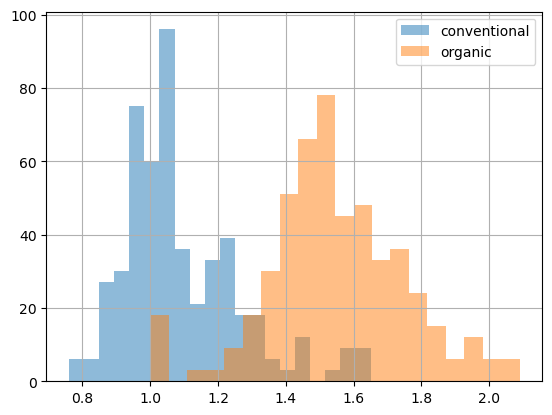

In [47]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5,bins=20)

# Modify bins to 20
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5,bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

<div class="css-ikv0qb"><h1 class="css-f2t179">Finding missing values</h1><div class="css-hu6jey"><div class="">
<p>Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.</p>
</div></div></div>

      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    False
53   False  False  False      False  False    False
54   False  False  False      False  False    False
55   False  False  False      False  False    False
56   False  False  False      False  False    False
..     ...    ...    ...        ...    ...      ...
944  False  False  False      False  False    False
945  False  False  False      False  False    False
946  False  False  False      False  False    False
947  False  False  False      False  False    False
948  False  False  False      False  False    False

[312 rows x 6 columns]
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


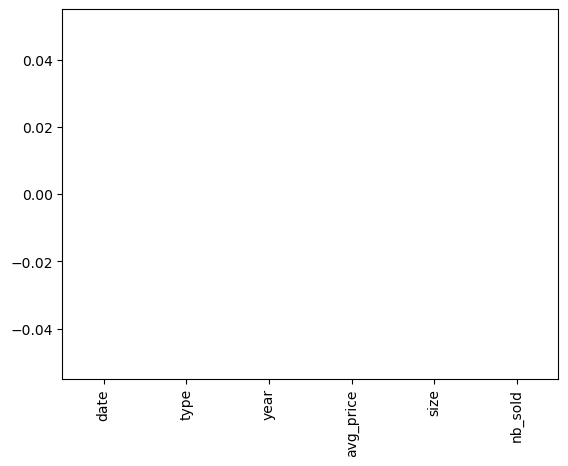

In [59]:
avocados=pd.read_csv('./Data set/avocado.csv')
avocados_2016=avocados[avocados['year']==2016]
# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind="bar")

# Show plot
plt.show()

<div class="css-ikv0qb"><h1 class="css-f2t179">Removing missing values</h1><div class="css-hu6jey"><div class="">
<p>Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.</p>
</div></div></div>

In [60]:
# Remove rows with missing values
avocados_complete =avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


<div class="css-ikv0qb"><h1 class="css-f2t179">Replacing missing values</h1><div class="css-hu6jey"><div class="">
<p>Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week. </p>
<p>In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:</p>
<pre><code>dogs[["height_cm", "weight_kg"]].hist()
</code></pre>
</div></div></div>

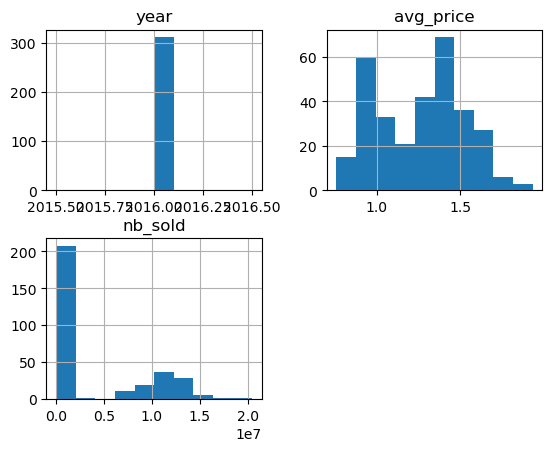

In [67]:
# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled.hist()

# Show the plot
plt.show()

<div class="css-ikv0qb"><h1 class="css-f2t179">List of dictionaries</h1><div class="css-hu6jey"><div class="">
<p>You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.</p>
<table>
<thead>
<tr>
<th>date</th>
<th>small_sold</th>
<th>large_sold</th>
</tr>
</thead>
<tbody>
<tr>
<td>"2019-11-03"</td>
<td>10376832</td>
<td>7835071</td>
</tr>
<tr>
<td>"2019-11-10"</td>
<td>10717154</td>
<td>8561348</td>
</tr>
</tbody>
</table>
<p><code>pandas</code> as <code>pd</code> is imported.</p></div></div></div>

In [68]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date":"2019-11-03", "small_sold":10376832, "large_sold": 7835071},
    {"date":"2019-11-10", "small_sold":10717154, "large_sold": 8561348}
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


<div class="css-ikv0qb"><h1 class="css-f2t179">Dictionary of lists</h1><div class="css-hu6jey"><div class="">
<p>Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.</p>
<table>
<thead>
<tr>
<th>date</th>
<th>small_sold</th>
<th>large_sold</th>
</tr>
</thead>
<tbody>
<tr>
<td>"2019-11-17"</td>
<td>10859987</td>
<td>7674135</td>
</tr>
<tr>
<td>"2019-12-01"</td>
<td>9291631</td>
<td>6238096</td>
</tr>
</tbody>
</table>
<p><code>pandas</code> as <code>pd</code> is imported.</p></div></div></div>

In [69]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


<div class="css-ikv0qb"><h1 class="css-f2t179">CSV to DataFrame</h1><div class="css-hu6jey"><div class="">
<p>You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights.
You got a CSV file (<code>airline_bumping.csv</code>) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!</p>
</div></div></div>

In [ ]:
# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv("airline_bumping.csv")

# Take a look at the DataFrame
print(airline_bumping.head())

<div class="css-ikv0qb"><h1 class="css-f2t179">DataFrame to CSV</h1><div class="css-hu6jey"><div class="">
<p>You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.</p>
<p><code>pandas</code> as <code>pd</code> has been imported for you.</p></div></div></div>

In [ ]:
# Create airline_totals_sorted
airline_totals_sorted =airline_totals.sort_values("bumps_per_10k",ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")